<a href="https://colab.research.google.com/github/aut31/Data-science-/blob/main/hanwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize input images
x_train = x_train / 255.0
x_test = x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [3]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8686 - loss: 0.4555 - val_accuracy: 0.9682 - val_loss: 0.1063
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9658 - loss: 0.1097 - val_accuracy: 0.9720 - val_loss: 0.0989
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9776 - loss: 0.0747 - val_accuracy: 0.9733 - val_loss: 0.0880
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9836 - loss: 0.0533 - val_accuracy: 0.9792 - val_loss: 0.0741
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9868 - loss: 0.0404 - val_accuracy: 0.9768 - val_loss: 0.0875
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9723 - loss: 0.0958
Test accuracy: 0.9761


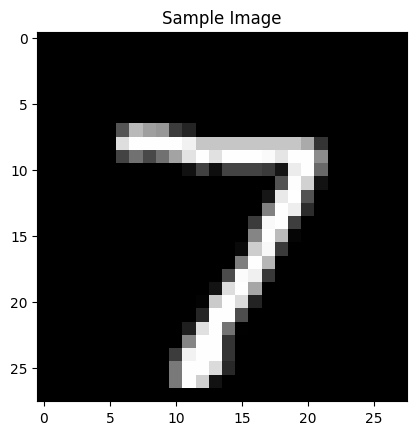

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted digit: 7


In [4]:
# Predict a sample image
import numpy as np
index = 0  # change to try different test images
sample_image = x_test[index]
plt.imshow(sample_image, cmap='gray')
plt.title("Sample Image")
plt.show()

# Make a prediction
prediction = model.predict(np.expand_dims(sample_image, axis=0))
print(f"Predicted digit: {np.argmax(prediction)}")
